In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('HDHI Admission data.csv')
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [94]:
data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [96]:
len(data.columns)

56

In [98]:
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
    'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 
    'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]


In [100]:
disease_values = data[disease_columns]
disease_values

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
print(data['GENDER'].value_counts())
print(data['RURAL'].value_counts())
print(data['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts())
print(data['OUTCOME'].value_counts())

GENDER
M    9990
F    5767
Name: count, dtype: int64
RURAL
U    12077
R     3680
Name: count, dtype: int64
TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64
OUTCOME
DISCHARGE    13756
EXPIRY        1105
DAMA           896
Name: count, dtype: int64


In [104]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING    

In [106]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE             

In [108]:
# Convert date columns to datetime
date_columns = ['D.O.A', 'D.O.D']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [110]:
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,NaT,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,NaT,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,NaT,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Calculate duration of stay (if not clean)
data['DURATION_OF_STAY'] = (data['D.O.D'] - data['D.O.A']).dt.days

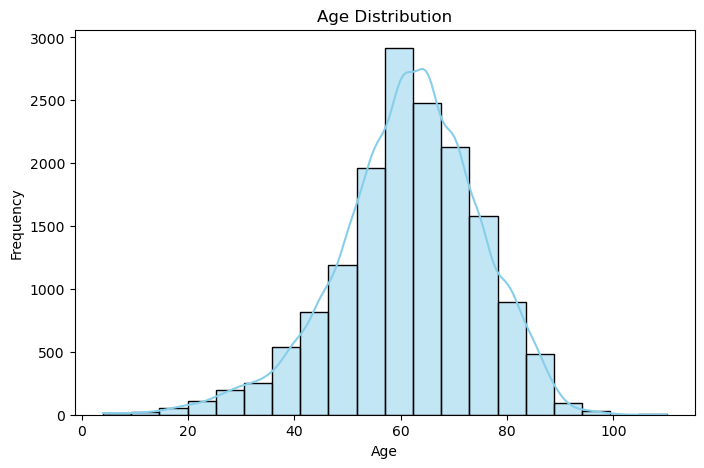

In [114]:
# Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(data['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

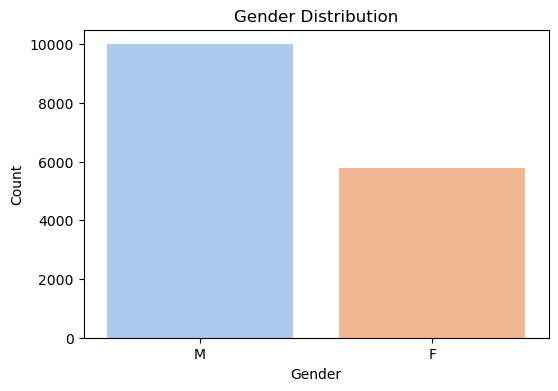

In [116]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

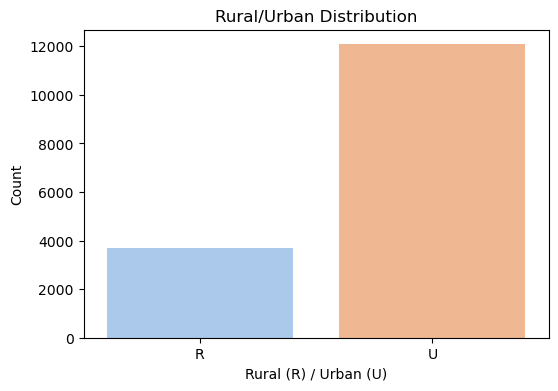

In [118]:

# Rural/Urban distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='RURAL', data=data, palette='pastel')
plt.title('Rural/Urban Distribution')
plt.xlabel('Rural (R) / Urban (U)')
plt.ylabel('Count')
plt.show()

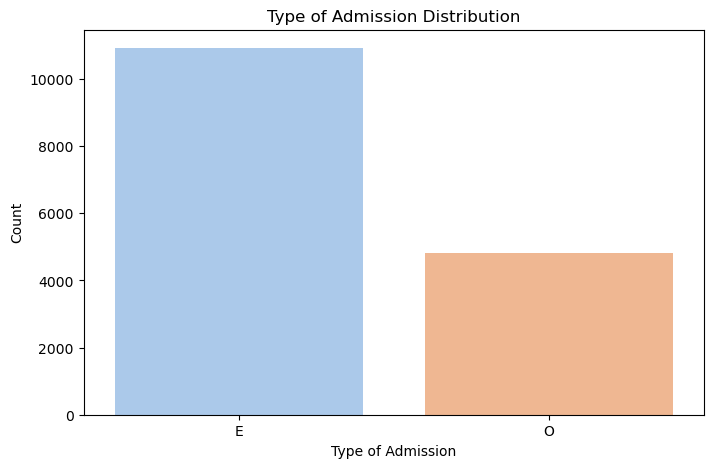

In [120]:

# Types of admission
plt.figure(figsize=(8, 5))
sns.countplot(x='TYPE OF ADMISSION-EMERGENCY/OPD', data=data, palette='pastel')
plt.title('Type of Admission Distribution')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.show()

In [122]:


# Top 5 conditions in the dataset (if applicable)
condition_columns = ['CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 
                     'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']


In [124]:
data[condition_columns]

,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15752,0,0,0,0,0,0,0,0,0,0
15753,0,0,0,0,0,0,0,0,0,0
15754,0,0,0,0,0,0,0,0,0,0
15755,0,0,0,0,0,0,0,0,0,0


In [126]:
data[condition_columns].isnull().sum()

CONGENITAL                   0
UTI                          0
NEURO CARDIOGENIC SYNCOPE    0
ORTHOSTATIC                  0
INFECTIVE ENDOCARDITIS       0
DVT                          0
CARDIOGENIC SHOCK            0
SHOCK                        0
PULMONARY EMBOLISM           0
CHEST INFECTION              0
dtype: int64

In [128]:
data[condition_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CONGENITAL                 15757 non-null  int64 
 1   UTI                        15757 non-null  int64 
 2   NEURO CARDIOGENIC SYNCOPE  15757 non-null  int64 
 3   ORTHOSTATIC                15757 non-null  int64 
 4   INFECTIVE ENDOCARDITIS     15757 non-null  int64 
 5   DVT                        15757 non-null  int64 
 6   CARDIOGENIC SHOCK          15757 non-null  int64 
 7   SHOCK                      15757 non-null  int64 
 8   PULMONARY EMBOLISM         15757 non-null  int64 
 9   CHEST INFECTION            15757 non-null  object
dtypes: int64(9), object(1)
memory usage: 1.2+ MB


In [132]:
print(data['CHEST INFECTION'].unique())

['0' '1' '\\']


In [133]:
data['CHEST INFECTION'].value_counts()

CHEST INFECTION
0    15415
1      341
\        1
Name: count, dtype: int64

In [136]:
data['CHEST INFECTION'].replace({"\\":'0'},inplace=True)

In [138]:
data['CHEST INFECTION'].value_counts()

CHEST INFECTION
0    15416
1      341
Name: count, dtype: int64

In [140]:
data['CHEST INFECTION'] = data['CHEST INFECTION'].astype(int)

In [142]:
top_conditions = data[condition_columns].sum().sort_values(ascending=False)




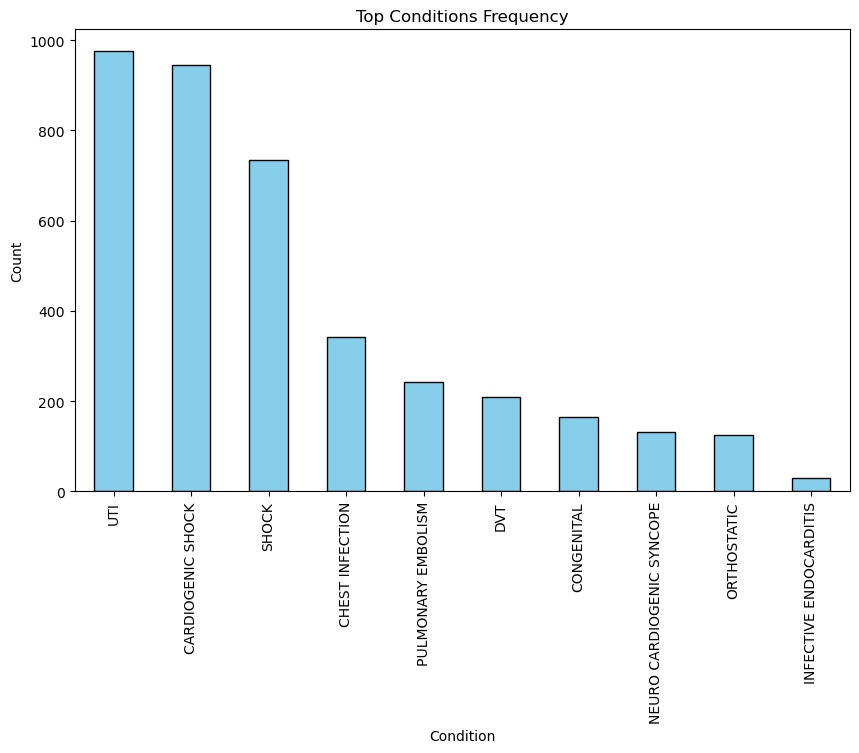

In [144]:
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Conditions Frequency')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [146]:
# Check for duplicate rows in the dataset
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print(f"Total number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Total number of duplicate rows: 0
Empty DataFrame
Columns: [SNO, MRD No., D.O.A, D.O.D, AGE, GENDER, RURAL, TYPE OF ADMISSION-EMERGENCY/OPD, month year, DURATION OF STAY, duration of intensive unit stay, OUTCOME, SMOKING , ALCOHOL, DM, HTN, CAD, PRIOR CMP, CKD, HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE, BNP, RAISED CARDIAC ENZYMES, EF, SEVERE ANAEMIA, ANAEMIA, STABLE ANGINA, ACS, STEMI, ATYPICAL CHEST PAIN, HEART FAILURE, HFREF, HFNEF, VALVULAR, CHB, SSS, AKI, CVA INFRACT, CVA BLEED, AF, VT, PSVT, CONGENITAL, UTI, NEURO CARDIOGENIC SYNCOPE, ORTHOSTATIC, INFECTIVE ENDOCARDITIS, DVT, CARDIOGENIC SHOCK, SHOCK, PULMONARY EMBOLISM, CHEST INFECTION, DURATION_OF_STAY]
Index: []

[0 rows x 57 columns]


In [148]:
import pandas as pd

# Extract the month from 'month year' column and create a new 'month' column
data['month'] = data['month year'].str[:3]  # Extracts the first three letters (e.g., 'Apr', 'May')

# Group by the 'month' and sum each disease count across all years
monthly_aggregated_counts = data.groupby('month')[disease_columns].sum()

# Reorder the months (Optional, for better readability)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_aggregated_counts = monthly_aggregated_counts.reindex(month_order)

# Display the result
print("Total count of each disease for every month (aggregated across all years):")
print(monthly_aggregated_counts)

Total count of each disease for every month (aggregated across all years):
        DM  HTN   CAD  PRIOR CMP  CKD  RAISED CARDIAC ENZYMES  SEVERE ANAEMIA  \
month                                                                           
Jan    539  799  1206        269  198                     354              37   
Feb    374  734  1039        222  157                     250              31   
Mar    362  690   962        207  132                     245              17   
Apr    343  488   639        187   67                     180              12   
May    493  614   809        225  117                     185              12   
Jun    491  616   786        240  111                     214              17   
Jul    404  549   760        183  115                     197              26   
Aug    354  506   733        151  122                     189              23   
Sep    352  578   800        190   97                     228              23   
Oct    340  599   848        175  

In [150]:
dataframe=data
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,DURATION_OF_STAY,month
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,4.0,Apr
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,7.0,Apr
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,22.0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,NaT,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,NaN,Mar
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,1.0,Mar
15754,15755,700415,NaT,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,NaN,Mar
15755,15756,699524,NaT,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,NaN,Mar


In [152]:
dataframe['HB']=dataframe['HB'].fillna(dataframe['HB'].mode()[0])

In [154]:
dataframe['TLC']=dataframe['TLC'].fillna(dataframe['TLC'].mode()[0])

In [156]:
dataframe['PLATELETS']=dataframe['PLATELETS'].fillna(dataframe['PLATELETS'].mode()[0])

In [158]:
dataframe['GLUCOSE']=dataframe['GLUCOSE'].fillna(dataframe['GLUCOSE'].mode()[0])

In [160]:
dataframe['UREA']=dataframe['UREA'].fillna(dataframe['UREA'].mode()[0])

In [162]:
dataframe['CREATININE']=dataframe['CREATININE'].fillna(dataframe['CREATININE'].mode()[0])

In [164]:
dataframe['BNP']=dataframe['BNP'].fillna(dataframe['BNP'].mode()[0])

In [166]:
dataframe['EF']=dataframe['EF'].fillna(dataframe['EF'].mode()[0])

In [168]:
dataframe.isnull().sum()

SNO                                   0
MRD No.                               0
D.O.A                              5655
D.O.D                              5550
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                    0
TLC                                   0
PLATELETS                             0
GLUCOSE                               0
UREA                                  0
CREATININE                            0


In [170]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              15757 non-null  int64         
 1   MRD No.                          15757 non-null  object        
 2   D.O.A                            10102 non-null  datetime64[ns]
 3   D.O.D                            10207 non-null  datetime64[ns]
 4   AGE                              15757 non-null  int64         
 5   GENDER                           15757 non-null  object        
 6   RURAL                            15757 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object        
 8   month year                       15757 non-null  object        
 9   DURATION OF STAY                 15757 non-null  int64         
 10  duration of intensive unit stay  15757 non-null  int64    

In [172]:
from scipy.stats import uniform
from sklearn import linear_model
from sklearn.utils import resample
from scipy.stats import loguniform
from sklearn.metrics import f1_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import precision_score
from scipy.stats import median_abs_deviation
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RepeatedStratifiedKFold


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [176]:
#use pipeline to scale numeric features and encode categorical features
numeric_features = ['AGE','duration of intensive unit stay','SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 
                    'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
                    'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
                    'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
                    'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
                    'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
                    'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
                    'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM']
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

categorical_features = ['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
                    'OUTCOME', 'CHEST INFECTION','lengthofstay']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
#cat_encoded = categorical_transformer.fit_transform(dataframe[['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD','OUTCOME', 'CHEST INFECTION']])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [178]:
dataframe

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,DURATION_OF_STAY,month
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,4.0,Apr
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,2.0,Apr
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,7.0,Apr
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,22.0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,NaT,2019-04-04,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,NaN,Mar
15753,15754,699500,2019-03-31,2019-04-01,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,1.0,Mar
15754,15755,700415,NaT,2019-09-04,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,NaN,Mar
15755,15756,699524,NaT,2019-03-04,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,NaN,Mar


In [180]:
dataframe.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'DURATION_OF_STAY', 'month'],
      dtype='object')

In [182]:
disease_columns

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [184]:
selected_features=[]
selected_features=disease_columns


In [186]:
selected_features

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [188]:
selected_features.append('month')

In [190]:
dataframe1=dataframe[selected_features]

In [192]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Apr
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Mar
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar


In [194]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM                         15757 non-null  int64 
 1   HTN                        15757 non-null  int64 
 2   CAD                        15757 non-null  int64 
 3   PRIOR CMP                  15757 non-null  int64 
 4   CKD                        15757 non-null  int64 
 5   RAISED CARDIAC ENZYMES     15757 non-null  int64 
 6   SEVERE ANAEMIA             15757 non-null  int64 
 7   ANAEMIA                    15757 non-null  int64 
 8   STABLE ANGINA              15757 non-null  int64 
 9   ACS                        15757 non-null  int64 
 10  STEMI                      15757 non-null  int64 
 11  ATYPICAL CHEST PAIN        15757 non-null  int64 
 12  HEART FAILURE              15757 non-null  int64 
 13  HFREF                      15757 non-null  int64 
 14  HFNEF 

In [196]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Apr
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Mar
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Mar
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mar


In [198]:
dataframe1['month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,"May":5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)



In [200]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,4
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [202]:
dataframe1['month'].value_counts()

month
1     1643
12    1542
11    1468
2     1432
10    1359
3     1355
9     1262
6     1194
5     1185
7     1176
8     1145
4      996
Name: count, dtype: int64

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [206]:
disease_columns = ['DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 
                   'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 
                   'STEMI', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
                   'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 
                   'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 
                   'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 
                   'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION']

In [208]:
data=dataframe1
# Assuming `data` is the DataFrame you've provided

# Step 1: Data Preprocessing
# Handling missing values (if any) - assuming data is clean already
data.fillna(0, inplace=True)

# Step 2: Feature and Target Selection
# We'll predict each disease one by one


# Example for predicting 'DM' (Diabetes Mellitus)
target = 'DM'

# Prepare feature matrix (X) and target vector (y)
X = data.drop(columns=['month', target])
y = data[target]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a model (Linear Regression or RandomForest)
# Example: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Step 7: Make predictions
# Predicting the number of DM cases in future months (e.g., for month 5)
future_month_data = data[data['month'] == 5].drop(columns=['month', target])
predictions = model.predict(future_month_data)

# Print predictions
print(f'Predictions for DM cases in month 5: {predictions}')


Mean Absolute Error (MAE): 0.3958307407615131
Mean Squared Error (MSE): 0.2171738780513182
Predictions for DM cases in month 5: [0.15982092 0.28682188 0.15982092 ... 0.32772735 0.2577664  0.07666265]


In [210]:
len(predictions)

1185

In [218]:
data=dataframe1
# Assuming `data` is the DataFrame you've provided

# Step 1: Data Preprocessing
# Handling missing values (if any) - assuming data is clean already
data.fillna(0, inplace=True)

# Step 2: Feature and Target Selection
# We'll predict each disease one by one


# Example for predicting 'DM' (Diabetes Mellitus)
#target = 'DM'

# Prepare feature matrix (X) and target vector (y)

#y = data[target]
# Loop over all diseases and predict
predictions_dict = {}
for target in disease_columns:
    print('target',target)
    X = data.drop(columns=['month', target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{target} - MAE: {mae}, MSE: {mse}')
    
    # Predict for a future month
    future_month_data = data[data['month'] == 5].drop(columns=['month', target])
    
    predictions_dict[target] = model.predict(future_month_data)
    
print(predictions_dict)


target DM
DM - MAE: 0.3958307407615131, MSE: 0.2171738780513182
target HTN
HTN - MAE: 0.40002094839749647, MSE: 0.21820870445990798
target CAD
CAD - MAE: 0.3155696215128322, MSE: 0.17803929866931462
target PRIOR CMP
PRIOR CMP - MAE: 0.2033959992145535, MSE: 0.11331222071337547
target CKD
CKD - MAE: 0.10185694064313233, MSE: 0.05710757634416401
target RAISED CARDIAC ENZYMES
RAISED CARDIAC ENZYMES - MAE: 0.24741581178286318, MSE: 0.13702781440997278
target SEVERE ANAEMIA
SEVERE ANAEMIA - MAE: 0.03429314119421214, MSE: 0.01846142398174216
target ANAEMIA
ANAEMIA - MAE: 0.231654091161436, MSE: 0.12919417344479397
target STABLE ANGINA
STABLE ANGINA - MAE: 0.12289827813029396, MSE: 0.06538302094992245
target ACS
ACS - MAE: 0.22608796099745992, MSE: 0.12460461455017696
target STEMI
STEMI - MAE: 0.14495051049993052, MSE: 0.07942711343059437
target HEART FAILURE
HEART FAILURE - MAE: 0.001915242934169166, MSE: 0.001082043306475011
target HFREF
HFREF - MAE: 0.002372965857440251, MSE: 0.00082414845

In [220]:
dataframe1

,DM,HTN,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,month
0,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,4
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3
15753,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
15754,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
15755,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
data=dataframe1
# Assuming `data` is the DataFrame you've provided

# Step 1: Data Preprocessing
# Handling missing values (if any) - assuming data is clean already
data.fillna(0, inplace=True)

# Step 2: Feature and Target Selection
# We'll predict each disease one by one


# Example for predicting 'DM' (Diabetes Mellitus)
target = 'DM'

# Prepare feature matrix (X) and target vector (y)
X = data.drop(columns=['month', target])
y = data[target]
# Assuming `data` is your DataFrame

# Step 1: Data Preprocessing (Handle missing values)
data.fillna(0, inplace=True)

# Step 2: Choose the disease for prediction (e.g., 'DM')
target = 'DM'

# Step 3: Prepare features (X) and target (y)
# We'll predict for one disease in a specific month
X = data.drop(columns=[target])  # All columns except the target disease
y = data[target]  # Target column ('DM' in this case)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model (optional but good for checking accuracy)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Step 7: Predict cases for a specific month (e.g., month 4)
# We filter the data to get features corresponding to month 4
month = 4
future_month_data = data[data['month'] == month].drop(columns=[target])  # Keep 'month' and other features
predictions = model.predict(future_month_data)

# Step 8: Display the predicted number of cases for the disease (e.g., DM) in month 4
print(f'Predicted number of DM cases in month {month}: {predictions.sum()}')


Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 4: 325.006238236268


In [232]:
def predict_cases(disease,month):
    
    data=dataframe1
    # Assuming `data` is the DataFrame you've provided
    
    # Step 1: Data Preprocessing
    # Handling missing values (if any) - assuming data is clean already
    data.fillna(0, inplace=True)

    # Prepare feature matrix (X) and target vector (y)
    X = data.drop(columns=['month', disease])
    y = data[target]
    # Assuming `data` is your DataFrame
    
    # Step 1: Data Preprocessing (Handle missing values)
    data.fillna(0, inplace=True)
    print('Predicting Number of Cases of Disease ',disease,'in Month ',month)
    
    X = data.drop(columns=[disease])  # All columns except the target disease
    y = data[disease]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    
    future_month_data = data[data['month'] == month].drop(columns=[disease]) 
    predictions = model.predict(future_month_data)
    rounded_value = round(predictions.sum())
    print(f'Predicted number of DM cases in month {month}: {rounded_value}')
    
    return rounded_value

In [234]:
predict_cases('PULMONARY EMBOLISM',2)

Predicting Number of Cases of Disease  PULMONARY EMBOLISM in Month  2
Mean Absolute Error (MAE): 0.026463829664839927
Mean Squared Error (MSE): 0.012871025964149189
Predicted number of DM cases in month 2: 16


16

In [236]:
predict_cases('HFREF',2)

Predicting Number of Cases of Disease  HFREF in Month  2
Mean Absolute Error (MAE): 0.0024205985823609563
Mean Squared Error (MSE): 0.000922408186987493
Predicted number of DM cases in month 2: 275


275

In [238]:
predict_cases('HEART FAILURE',2)

Predicting Number of Cases of Disease  HEART FAILURE in Month  2
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of DM cases in month 2: 497


497

In [240]:
predict_cases('HEART FAILURE',12)

Predicting Number of Cases of Disease  HEART FAILURE in Month  12
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of DM cases in month 12: 506


506

In [242]:
predict_cases('HEART FAILURE',6)

Predicting Number of Cases of Disease  HEART FAILURE in Month  6
Mean Absolute Error (MAE): 0.0018912779938334082
Mean Squared Error (MSE): 0.001009518242391909
Predicted number of DM cases in month 6: 322


322

In [244]:
disease_columns

['DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'RAISED CARDIAC ENZYMES',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [246]:
month = 4
d={}
for disease in disease_columns:
    cases=predict_cases(disease,month)
    d[disease]=cases
    print('**************************************************************')
    
    

Predicting Number of Cases of Disease  DM in Month  4
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 4: 325
**************************************************************
Predicting Number of Cases of Disease  HTN in Month  4
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of DM cases in month 4: 493
**************************************************************
Predicting Number of Cases of Disease  CAD in Month  4
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of DM cases in month 4: 639
**************************************************************
Predicting Number of Cases of Disease  PRIOR CMP in Month  4
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of DM cases in month 4: 198
*************************************

In [248]:
d

{'DM': 325,
 'HTN': 493,
 'CAD': 639,
 'PRIOR CMP': 198,
 'CKD': 75,
 'RAISED CARDIAC ENZYMES': 183,
 'SEVERE ANAEMIA': 16,
 'ANAEMIA': 144,
 'STABLE ANGINA': 90,
 'ACS': 350,
 'STEMI': 135,
 'HEART FAILURE': 225,
 'HFREF': 121,
 'HFNEF': 104,
 'VALVULAR': 51,
 'CHB': 31,
 'SSS': 11,
 'AKI': 190,
 'CVA INFRACT': 46,
 'CVA BLEED': 10,
 'AF': 62,
 'VT': 52,
 'PSVT': 3,
 'CONGENITAL': 19,
 'UTI': 86,
 'NEURO CARDIOGENIC SYNCOPE': 5,
 'ORTHOSTATIC': 14,
 'INFECTIVE ENDOCARDITIS': 6,
 'DVT': 19,
 'CARDIOGENIC SHOCK': 79,
 'SHOCK': 69,
 'PULMONARY EMBOLISM': 14,
 'CHEST INFECTION': 23}

In [250]:
top_5_values = sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]

print(top_5_values)

[('CAD', 639), ('HTN', 493), ('ACS', 350), ('DM', 325), ('HEART FAILURE', 225)]


In [252]:
dfDrug=pd.read_csv('drugs.csv')

In [253]:
dfDrug

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,01-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [254]:
l=dfDrug['condition'].unique()

In [255]:
l

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [260]:
ind=[]
for i in range(len(l)):
    try:
        if 'fever' in l[i].lower() or 'covid' in l[i].lower():
            print('Fever or covid')
            ind.append(i)
    except:
        pass

Fever or covid
Fever or covid
Fever or covid


In [262]:
ind

[110, 408, 434]

In [264]:
dfDrug['drugName'][110]

'Ropinirole'

In [269]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()


In [271]:
drugs=[]
for i in ind:
    drug_name=dfDrug['drugName'][i]
    review=dfDrug['review'][i]
    rating=dfDrug['rating'][i]
    score = analyzer.polarity_scores(review)
    p=float(score['pos'])
    ne=float(score['neu'])
    n=float(score['neg'])
    performance = [p,n,ne]
    index=performance.index(max(performance))
    if (index==0):
        result='positive'
    elif (index==1):
        result='negative'
    elif (index==2):
        result='neutral'
    print('result',result)
    if result=='positive' or result=='neutral':
        if int(rating)>5:
            drugs.append(drug_name)
    

result neutral
result neutral
result neutral


In [273]:
drugs

['Ropinirole', 'Exenatide']

In [275]:
month = 4
d={}
for disease in disease_columns:
    cases=predict_cases(disease,month)
    d[disease]=cases
    print('**************************************************************')
    
    

Predicting Number of Cases of Disease  DM in Month  4
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 4: 325
**************************************************************
Predicting Number of Cases of Disease  HTN in Month  4
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of DM cases in month 4: 493
**************************************************************
Predicting Number of Cases of Disease  CAD in Month  4
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of DM cases in month 4: 639
**************************************************************
Predicting Number of Cases of Disease  PRIOR CMP in Month  4
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of DM cases in month 4: 198
*************************************

In [279]:
def find_disease_medicine(month,topc):
    d={}
    for disease in disease_columns:
        cases=predict_cases(disease,month)
        d[disease]=cases
    top_values = sorted(d.items(), key=lambda x: x[1], reverse=True)[:topc]

    print(top_values)
    for i in top_values:
        disease=top_values[0]
        ind=[]
        for i in range(len(l)):
            try:
                if disease in l[i].lower() :
                    print(disease,'in',i)
                    ind.append(i)
            except:
                pass
        drugs=[]
        for i in ind:
            drug_name=dfDrug['drugName'][i]
            review=dfDrug['review'][i]
            rating=dfDrug['rating'][i]
            score = analyzer.polarity_scores(review)
            p=float(score['pos'])
            ne=float(score['neu'])
            n=float(score['neg'])
            performance = [p,n,ne]
            index=performance.index(max(performance))
            if (index==0):
                result='positive'
            elif (index==1):
                result='negative'
            elif (index==2):
                result='neutral'
            print('result',result)
            if result=='positive' or result=='neutral':
                if int(rating)>5:
                    drugs.append(drug_name)
        print(drugs)
        
        
    

In [281]:
find_disease_medicine(7,8)

Predicting Number of Cases of Disease  DM in Month  7
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 7: 426
Predicting Number of Cases of Disease  HTN in Month  7
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of DM cases in month 7: 557
Predicting Number of Cases of Disease  CAD in Month  7
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of DM cases in month 7: 760
Predicting Number of Cases of Disease  PRIOR CMP in Month  7
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of DM cases in month 7: 202
Predicting Number of Cases of Disease  CKD in Month  7
Mean Absolute Error (MAE): 0.10279964566138572
Mean Squared Error (MSE): 0.05864940031985772
Predicted number of DM cases in month 7: 115
Predicting Number of Cases of Dis

In [283]:
dfDrug['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [285]:
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
    'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 
    'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]


In [287]:
l1=dfDrug['condition'].unique()

In [289]:
l1

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [291]:
len(l1)

888

In [293]:
type(l1)

numpy.ndarray

In [295]:
l2 = l1.tolist()

In [297]:
l2

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 nan,
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'S

In [299]:
for i in range(len(l2)):
    print(l2[i],type(l2[i]))

Left Ventricular Dysfunction <class 'str'>
ADHD <class 'str'>
Birth Control <class 'str'>
Opiate Dependence <class 'str'>
Benign Prostatic Hyperplasia <class 'str'>
Emergency Contraception <class 'str'>
Bipolar Disorde <class 'str'>
Epilepsy <class 'str'>
Migraine Prevention <class 'str'>
Depression <class 'str'>
Crohn's Disease <class 'str'>
Cough <class 'str'>
Obesity <class 'str'>
Urinary Tract Infection <class 'str'>
ibromyalgia <class 'str'>
Chronic Myelogenous Leukemia <class 'str'>
HIV Infection <class 'str'>
Insomnia <class 'str'>
Rheumatoid Arthritis <class 'str'>
Vaginal Yeast Infection <class 'str'>
Chlamydia Infection <class 'str'>
Hirsutism <class 'str'>
Panic Disorde <class 'str'>
Migraine <class 'str'>
nan <class 'float'>
Pain <class 'str'>
Irritable Bowel Syndrome <class 'str'>
Osteoarthritis <class 'str'>
Constipation <class 'str'>
Bowel Preparation <class 'str'>
Psychosis <class 'str'>
Muscle Spasm <class 'str'>
Hepatitis C <class 'str'>
Overactive Bladde <class 'str'

48</span> users found this comment helpful. <class 'str'>
Dementia <class 'str'>
Ocular Rosacea <class 'str'>
Hidradenitis Suppurativa <class 'str'>
SIADH <class 'str'>
Bullous Pemphigoid <class 'str'>
Angioedema <class 'str'>
Mountain Sickness / Altitude Sickness <class 'str'>
Severe Mood Dysregulation <class 'str'>
Cutaneous T-cell Lymphoma <class 'str'>
Adrenocortical Insufficiency <class 'str'>
Myxedema Coma <class 'str'>
Small Bowel Bacterial Overgrowth <class 'str'>
Sunburn <class 'str'>
33</span> users found this comment helpful. <class 'str'>
Transverse Myelitis <class 'str'>
Squamous Cell Carcinoma <class 'str'>
Parkinsonism <class 'str'>
22</span> users found this comment helpful. <class 'str'>
Thyrotoxicosis <class 'str'>
29</span> users found this comment helpful. <class 'str'>
30</span> users found this comment helpful. <class 'str'>
Epididymitis, Sexually Transmitted <class 'str'>
Neck Pain <class 'str'>
Bleeding Disorde <class 'str'>
63</span> users found this comment he

In [301]:
unique_types = {type(element) for element in l2}

# Print the result
print("Unique data types:", unique_types)

Unique data types: {<class 'str'>, <class 'float'>}


In [303]:
for i in range(len(l2)):
    l2[i]=str(l2[i])

In [305]:
substring='comment'

In [307]:
filtered_list = [item for item in l2 if substring not in item]

In [309]:
filtered_list

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 'nan',
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 

In [311]:
len(filtered_list)

815

In [313]:
disease_columns = [
    'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
    'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 
    'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 
    'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]


In [315]:
len(disease_columns)

34

In [317]:
'''
Matches:
Left Ventricular Dysfunction ↔ Heart Failure
HTN (Hypertension) ↔ High Blood Pressure
DM (Diabetes Mellitus) ↔ Diabetes, Type 1 / Diabetes, Type 2
CAD (Coronary Artery Disease) ↔ Angina / Cardiovascular Risk Reduction
ACS (Acute Coronary Syndrome) ↔ Heart Attack / Angina Pectoris Prophylaxis
STEMI (ST-Elevation Myocardial Infarction) ↔ Heart Attack
Atrial Fibrillation (AF) ↔ Atrial Fibrillation
VT (Ventricular Tachycardia) ↔ Ventricular Tachycardia
PSVT (Paroxysmal Supraventricular Tachycardia) ↔ Paroxysmal Supraventricular Tachycardia
UTI (Urinary Tract Infection) ↔ Urinary Tract Infection
Severe Anaemia / Anaemia ↔ Anemia / Iron Deficiency Anemia
CVA Infarct / CVA Bleed (Stroke) ↔ Ischemic Stroke / Transient Ischemic Attack
Pulmonary Embolism (PE) ↔ Pulmonary Embolism
Infective Endocarditis ↔ Bacterial Endocarditis Prevention
DVT (Deep Vein Thrombosis) ↔ Deep Vein Thrombosis
CKD (Chronic Kidney Disease) ↔ Diabetic Kidney Disease / Kidney Infections
'''

'\nMatches:\nLeft Ventricular Dysfunction ↔ Heart Failure\nHTN (Hypertension) ↔ High Blood Pressure\nDM (Diabetes Mellitus) ↔ Diabetes, Type 1 / Diabetes, Type 2\nCAD (Coronary Artery Disease) ↔ Angina / Cardiovascular Risk Reduction\nACS (Acute Coronary Syndrome) ↔ Heart Attack / Angina Pectoris Prophylaxis\nSTEMI (ST-Elevation Myocardial Infarction) ↔ Heart Attack\nAtrial Fibrillation (AF) ↔ Atrial Fibrillation\nVT (Ventricular Tachycardia) ↔ Ventricular Tachycardia\nPSVT (Paroxysmal Supraventricular Tachycardia) ↔ Paroxysmal Supraventricular Tachycardia\nUTI (Urinary Tract Infection) ↔ Urinary Tract Infection\nSevere Anaemia / Anaemia ↔ Anemia / Iron Deficiency Anemia\nCVA Infarct / CVA Bleed (Stroke) ↔ Ischemic Stroke / Transient Ischemic Attack\nPulmonary Embolism (PE) ↔ Pulmonary Embolism\nInfective Endocarditis ↔ Bacterial Endocarditis Prevention\nDVT (Deep Vein Thrombosis) ↔ Deep Vein Thrombosis\nCKD (Chronic Kidney Disease) ↔ Diabetic Kidney Disease / Kidney Infections\n'

In [319]:
'''
Possible Matches (Less Direct):
Shock / Cardiogenic Shock ↔ Hypotension / Pulmonary Hypertension
Chest Infection ↔ Bronchitis / Pneumonia / COPD, Acute
Stable Angina ↔ Angina
Neurocardiogenic Syncope / Orthostatic ↔ Dysautonomia / Orthostatic Hypotension
Heart Failure with Preserved/Reduced EF (HFpEF/HFrEF) ↔ Heart Failure
Congenital (Heart Conditions) ↔ Congenital Conditions (varied)
'''

'\nPossible Matches (Less Direct):\nShock / Cardiogenic Shock ↔ Hypotension / Pulmonary Hypertension\nChest Infection ↔ Bronchitis / Pneumonia / COPD, Acute\nStable Angina ↔ Angina\nNeurocardiogenic Syncope / Orthostatic ↔ Dysautonomia / Orthostatic Hypotension\nHeart Failure with Preserved/Reduced EF (HFpEF/HFrEF) ↔ Heart Failure\nCongenital (Heart Conditions) ↔ Congenital Conditions (varied)\n'

In [321]:
dm=['Diabetes, Type 1','Insulin Resistance Syndrome','Diabetes, Type 2','Diabetic Peripheral Neuropathy','Diabetic Kidney Disease',
'Hypothyroidism, After Thyroid Removal','Hyperthyroidism','Hypogonadism, Male','Hyperlipoproteinemia Type IIa, Elevated LDL',
'Hypertriglyceridemia']

dm


['Diabetes, Type 1',
 'Insulin Resistance Syndrome',
 'Diabetes, Type 2',
 'Diabetic Peripheral Neuropathy',
 'Diabetic Kidney Disease',
 'Hypothyroidism, After Thyroid Removal',
 'Hyperthyroidism',
 'Hypogonadism, Male',
 'Hyperlipoproteinemia Type IIa, Elevated LDL',
 'Hypertriglyceridemia']

In [323]:
for i in dm:
    if i in filtered_list:
        print(i,'match')

Diabetes, Type 1 match
Insulin Resistance Syndrome match
Diabetes, Type 2 match
Diabetic Peripheral Neuropathy match
Diabetic Kidney Disease match
Hypothyroidism, After Thyroid Removal match
Hyperthyroidism match
Hypogonadism, Male match
Hyperlipoproteinemia Type IIa, Elevated LDL match
Hypertriglyceridemia match


In [325]:
htn=['Hypertension', 'Hyperlipoproteinemia Type IIa, Elevated LDL','Hypertriglyceridemia','Atherosclerosis','Heart Failure, Congestive',
     'Chronic Renal Insufficiency','Stroke, Ischemic']
htn


['Hypertension',
 'Hyperlipoproteinemia Type IIa, Elevated LDL',
 'Hypertriglyceridemia',
 'Atherosclerosis',
 'Heart Failure, Congestive',
 'Chronic Renal Insufficiency',
 'Stroke, Ischemic']

In [327]:
for i in htn:
    if i in filtered_list:
        print(i,'match')

Hyperlipoproteinemia Type IIa, Elevated LDL match
Hypertriglyceridemia match
Atherosclerosis match


In [329]:
cad=['Atherosclerosis','Heart Failure, Congestive','Stroke, Ischemic','Hyperlipoproteinemia Type IIa, Elevated LDL','Hypertriglyceridemia']


cad



['Atherosclerosis',
 'Heart Failure, Congestive',
 'Stroke, Ischemic',
 'Hyperlipoproteinemia Type IIa, Elevated LDL',
 'Hypertriglyceridemia']

In [331]:
for i in cad:
    if i in filtered_list:
        print(i,'match')

Atherosclerosis match
Hyperlipoproteinemia Type IIa, Elevated LDL match
Hypertriglyceridemia match


In [333]:
disease_dict={
    
    'dm':dm,
    'htn':htn,
    'cad':cad
    
    
}

In [335]:
disease_dict

{'dm': ['Diabetes, Type 1',
  'Insulin Resistance Syndrome',
  'Diabetes, Type 2',
  'Diabetic Peripheral Neuropathy',
  'Diabetic Kidney Disease',
  'Hypothyroidism, After Thyroid Removal',
  'Hyperthyroidism',
  'Hypogonadism, Male',
  'Hyperlipoproteinemia Type IIa, Elevated LDL',
  'Hypertriglyceridemia'],
 'htn': ['Hypertension',
  'Hyperlipoproteinemia Type IIa, Elevated LDL',
  'Hypertriglyceridemia',
  'Atherosclerosis',
  'Heart Failure, Congestive',
  'Chronic Renal Insufficiency',
  'Stroke, Ischemic'],
 'cad': ['Atherosclerosis',
  'Heart Failure, Congestive',
  'Stroke, Ischemic',
  'Hyperlipoproteinemia Type IIa, Elevated LDL',
  'Hypertriglyceridemia']}

In [337]:
def find_top_disease(month,topc):
    d={}
    for disease in disease_columns:
        cases=predict_cases(disease,month)
        d[disease]=cases
    top_values = sorted(d.items(), key=lambda x: x[1], reverse=True)[:topc]

    return top_values,d
   

In [339]:
top_values,d=find_top_disease(5,8)

Predicting Number of Cases of Disease  DM in Month  5
Mean Absolute Error (MAE): 0.38830585513167126
Mean Squared Error (MSE): 0.22096977977256516
Predicted number of DM cases in month 5: 490
Predicting Number of Cases of Disease  HTN in Month  5
Mean Absolute Error (MAE): 0.3942028108904685
Mean Squared Error (MSE): 0.22407573607209788
Predicted number of DM cases in month 5: 611
Predicting Number of Cases of Disease  CAD in Month  5
Mean Absolute Error (MAE): 0.3140210192719554
Mean Squared Error (MSE): 0.1829800826024469
Predicted number of DM cases in month 5: 799
Predicting Number of Cases of Disease  PRIOR CMP in Month  5
Mean Absolute Error (MAE): 0.20597725868396627
Mean Squared Error (MSE): 0.11934503308175115
Predicted number of DM cases in month 5: 225
Predicting Number of Cases of Disease  CKD in Month  5
Mean Absolute Error (MAE): 0.10279964566138572
Mean Squared Error (MSE): 0.05864940031985772
Predicted number of DM cases in month 5: 126
Predicting Number of Cases of Dis

In [341]:
top_values

[('CAD', 799),
 ('HTN', 611),
 ('DM', 490),
 ('ACS', 446),
 ('HEART FAILURE', 310),
 ('AKI', 290),
 ('ANAEMIA', 229),
 ('PRIOR CMP', 225)]

In [343]:
 for i in top_values:
        disease=i[0].lower()
        if disease in disease_dict.keys():
            dl=disease_dict[disease]
            print("Predicted Diseases are ",dl)
            ind=[]
            for k in dl:
                for i in range(len(l)):
                    try:
                        if k.lower() == l[i].lower() :
                            print(k,'in',i)
                            ind.append(i)
                    except:
                        pass
        drugs=[]
        print(ind)
        for i in ind:
            drug_name=dfDrug['drugName'][i]
            review=dfDrug['review'][i]
            rating=dfDrug['rating'][i]
            score = analyzer.polarity_scores(review)
            p=float(score['pos'])
            ne=float(score['neu'])
            n=float(score['neg'])
            performance = [p,n,ne]
            index=performance.index(max(performance))
            if (index==0):
                result='positive'
            elif (index==1):
                result='negative'
            elif (index==2):
                result='neutral'
            print('result',result)
            if result=='positive' or result=='neutral':
                if int(rating)>5:
                    drugs.append(drug_name)
        print(drugs)
        
        
    

Predicted Diseases are  ['Atherosclerosis', 'Heart Failure, Congestive', 'Stroke, Ischemic', 'Hyperlipoproteinemia Type IIa, Elevated LDL', 'Hypertriglyceridemia']
Atherosclerosis in 570
Hyperlipoproteinemia Type IIa, Elevated LDL in 504
Hypertriglyceridemia in 302
[570, 504, 302]
result neutral
result neutral
result neutral
['Sprintec', 'Sertraline']
Predicted Diseases are  ['Hypertension', 'Hyperlipoproteinemia Type IIa, Elevated LDL', 'Hypertriglyceridemia', 'Atherosclerosis', 'Heart Failure, Congestive', 'Chronic Renal Insufficiency', 'Stroke, Ischemic']
Hyperlipoproteinemia Type IIa, Elevated LDL in 504
Hypertriglyceridemia in 302
Atherosclerosis in 570
[504, 302, 570]
result neutral
result neutral
result neutral
['Sertraline', 'Sprintec']
Predicted Diseases are  ['Diabetes, Type 1', 'Insulin Resistance Syndrome', 'Diabetes, Type 2', 'Diabetic Peripheral Neuropathy', 'Diabetic Kidney Disease', 'Hypothyroidism, After Thyroid Removal', 'Hyperthyroidism', 'Hypogonadism, Male', 'Hyper